#### Importing Packages 

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#### Data Warehousing 

In [3]:
df1 = pd.read_json(r'Part1 - Car-Attributes.json')
df1.to_csv(r'Car-Attributes.csv', index = None)
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
df1.shape

(398, 8)

In [10]:
df2 = pd.read_csv('Part1 - Car name.csv')
df2.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [6]:
df2.shape

(398, 1)

In [13]:
df = df2.join(df1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
df.shape

(398, 9)

#### Data Cleansing 

In [16]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [17]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [21]:
for i in df.columns:
    check = df[i].isnull().values.any()
    print(i,' - ', check)

car_name  -  False
mpg  -  False
cyl  -  False
disp  -  False
hp  -  False
wt  -  False
acc  -  False
yr  -  False
origin  -  False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [24]:
carDataAttr=df.iloc[:,1:]
carDataAttr.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


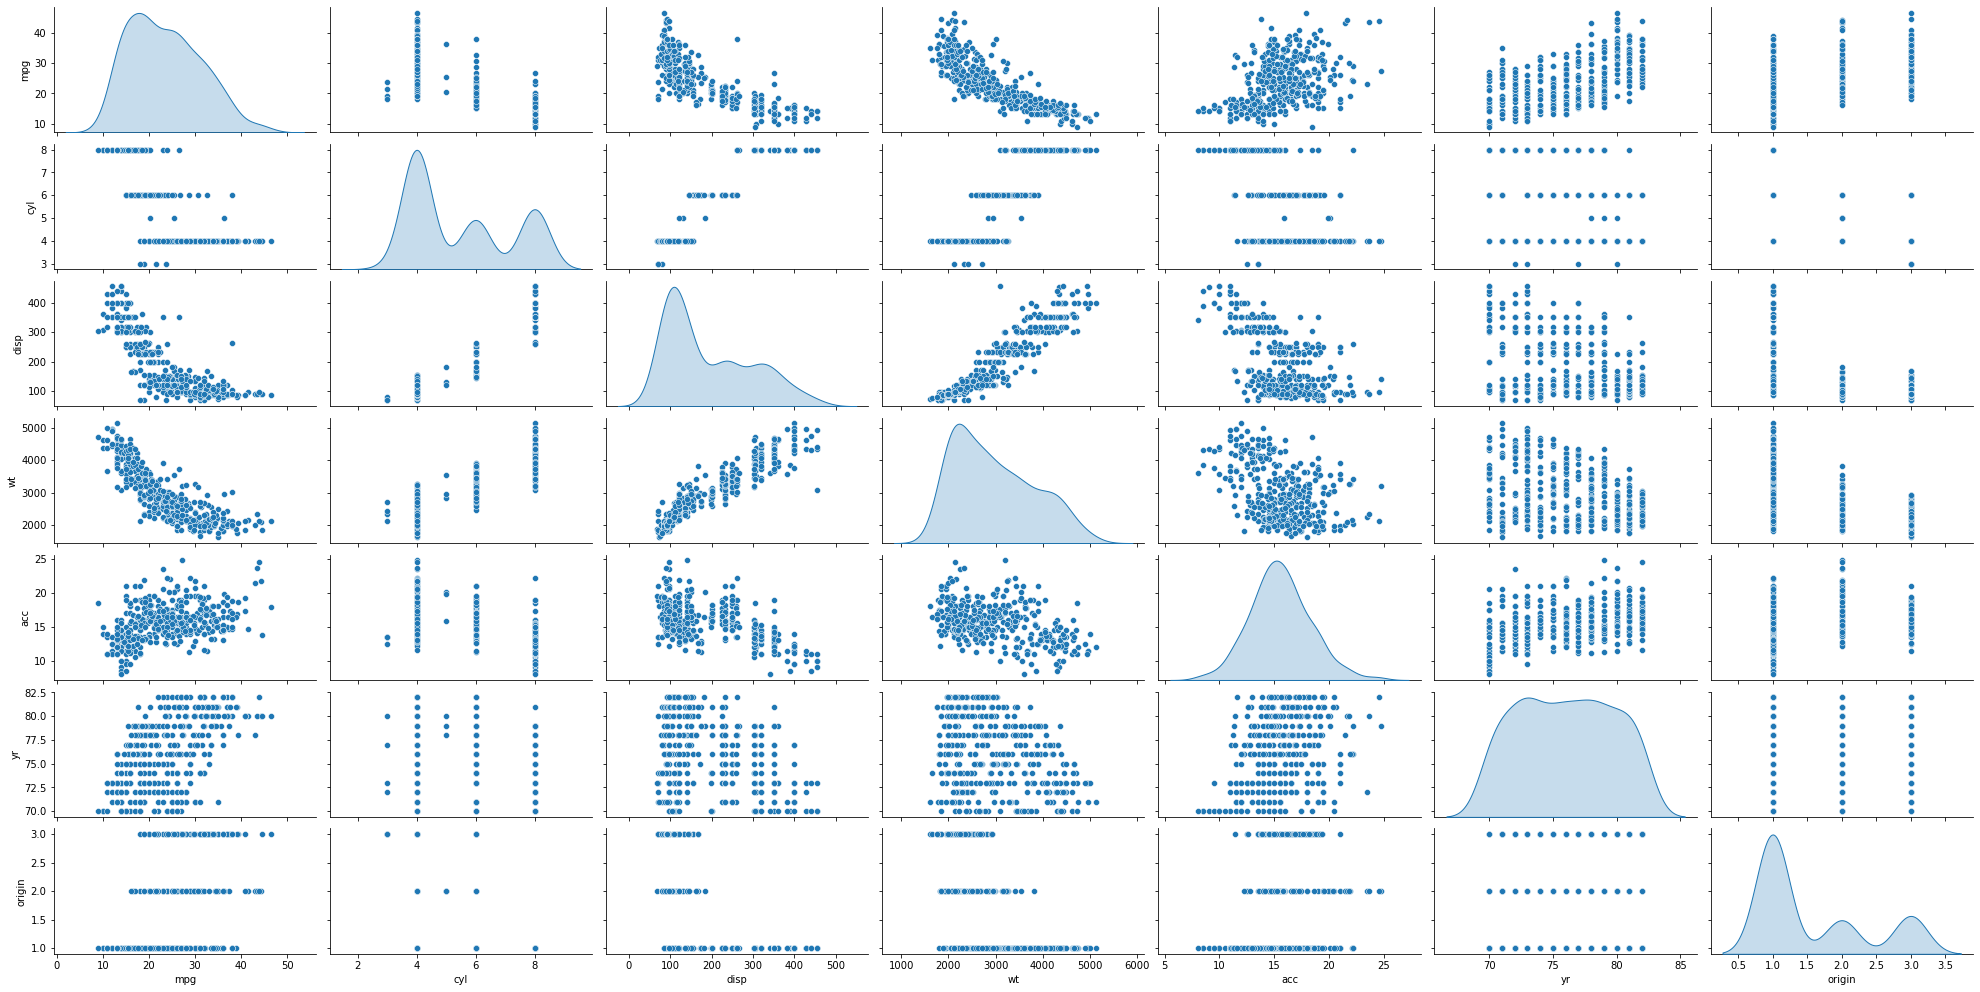

In [26]:
#importing seaborn for statistical plots
sns.pairplot(carDataAttr, height=2,aspect=2 , diag_kind='kde');

In [48]:
df_org = df.groupby(['origin'])
df_org['origin'].unique()

origin
1    [1]
2    [2]
3    [3]
Name: origin, dtype: object

In [43]:
df_cyl = df.groupby(['cyl'])
df_cyl['cyl'].unique()

cyl
3    [3]
4    [4]
5    [5]
6    [6]
8    [8]
Name: cyl, dtype: object

/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


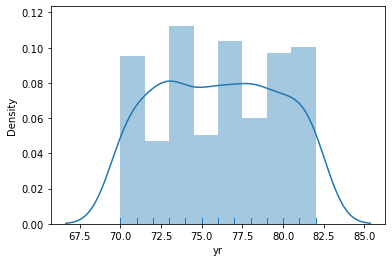

In [46]:
sns.distplot(df['yr'], rug= True, kde=True);

In [49]:
carDataAttr.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [53]:
carDataAttr['hp']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [54]:
carDataAttr = carDataAttr.replace('?', np.nan)

In [59]:
carDataAttr['hp'].isnull().sum()

6

In [56]:
carDataAttr['hp'] = pd.to_numeric(carDataAttr['hp'])

/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


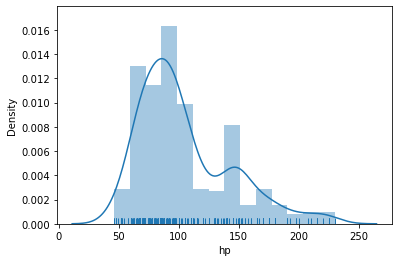

In [57]:
sns.distplot(carDataAttr['hp'], rug= True, kde=True);

In [60]:
mean_value = carDataAttr['hp'].mean()
carDataAttr['hp'].fillna(value=mean_value, inplace=True)

In [61]:
carDataAttr['hp'].isnull().sum()

0

/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abishekfranklin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


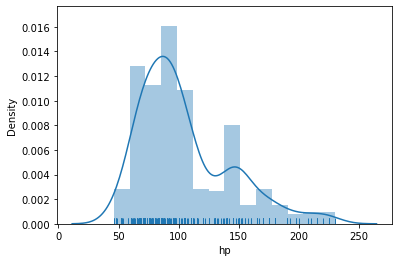

In [62]:
sns.distplot(carDataAttr['hp'], rug= True, kde=True);

In [63]:
custDataScaled=carDataAttr.apply(zscore)
custDataScaled.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
5,-1.090751,1.498191,2.262118,2.451579,1.620492,-2.021656,-1.627426,-0.715145
6,-1.218855,1.498191,2.502182,3.028233,1.635863,-2.384735,-1.627426,-0.715145
7,-1.218855,1.498191,2.367746,2.897175,1.586204,-2.566274,-1.627426,-0.715145
8,-1.218855,1.498191,2.511784,3.159290,1.719809,-2.021656,-1.627426,-0.715145
9,-1.090751,1.498191,1.887617,2.241887,1.039961,-2.566274,-1.627426,-0.715145


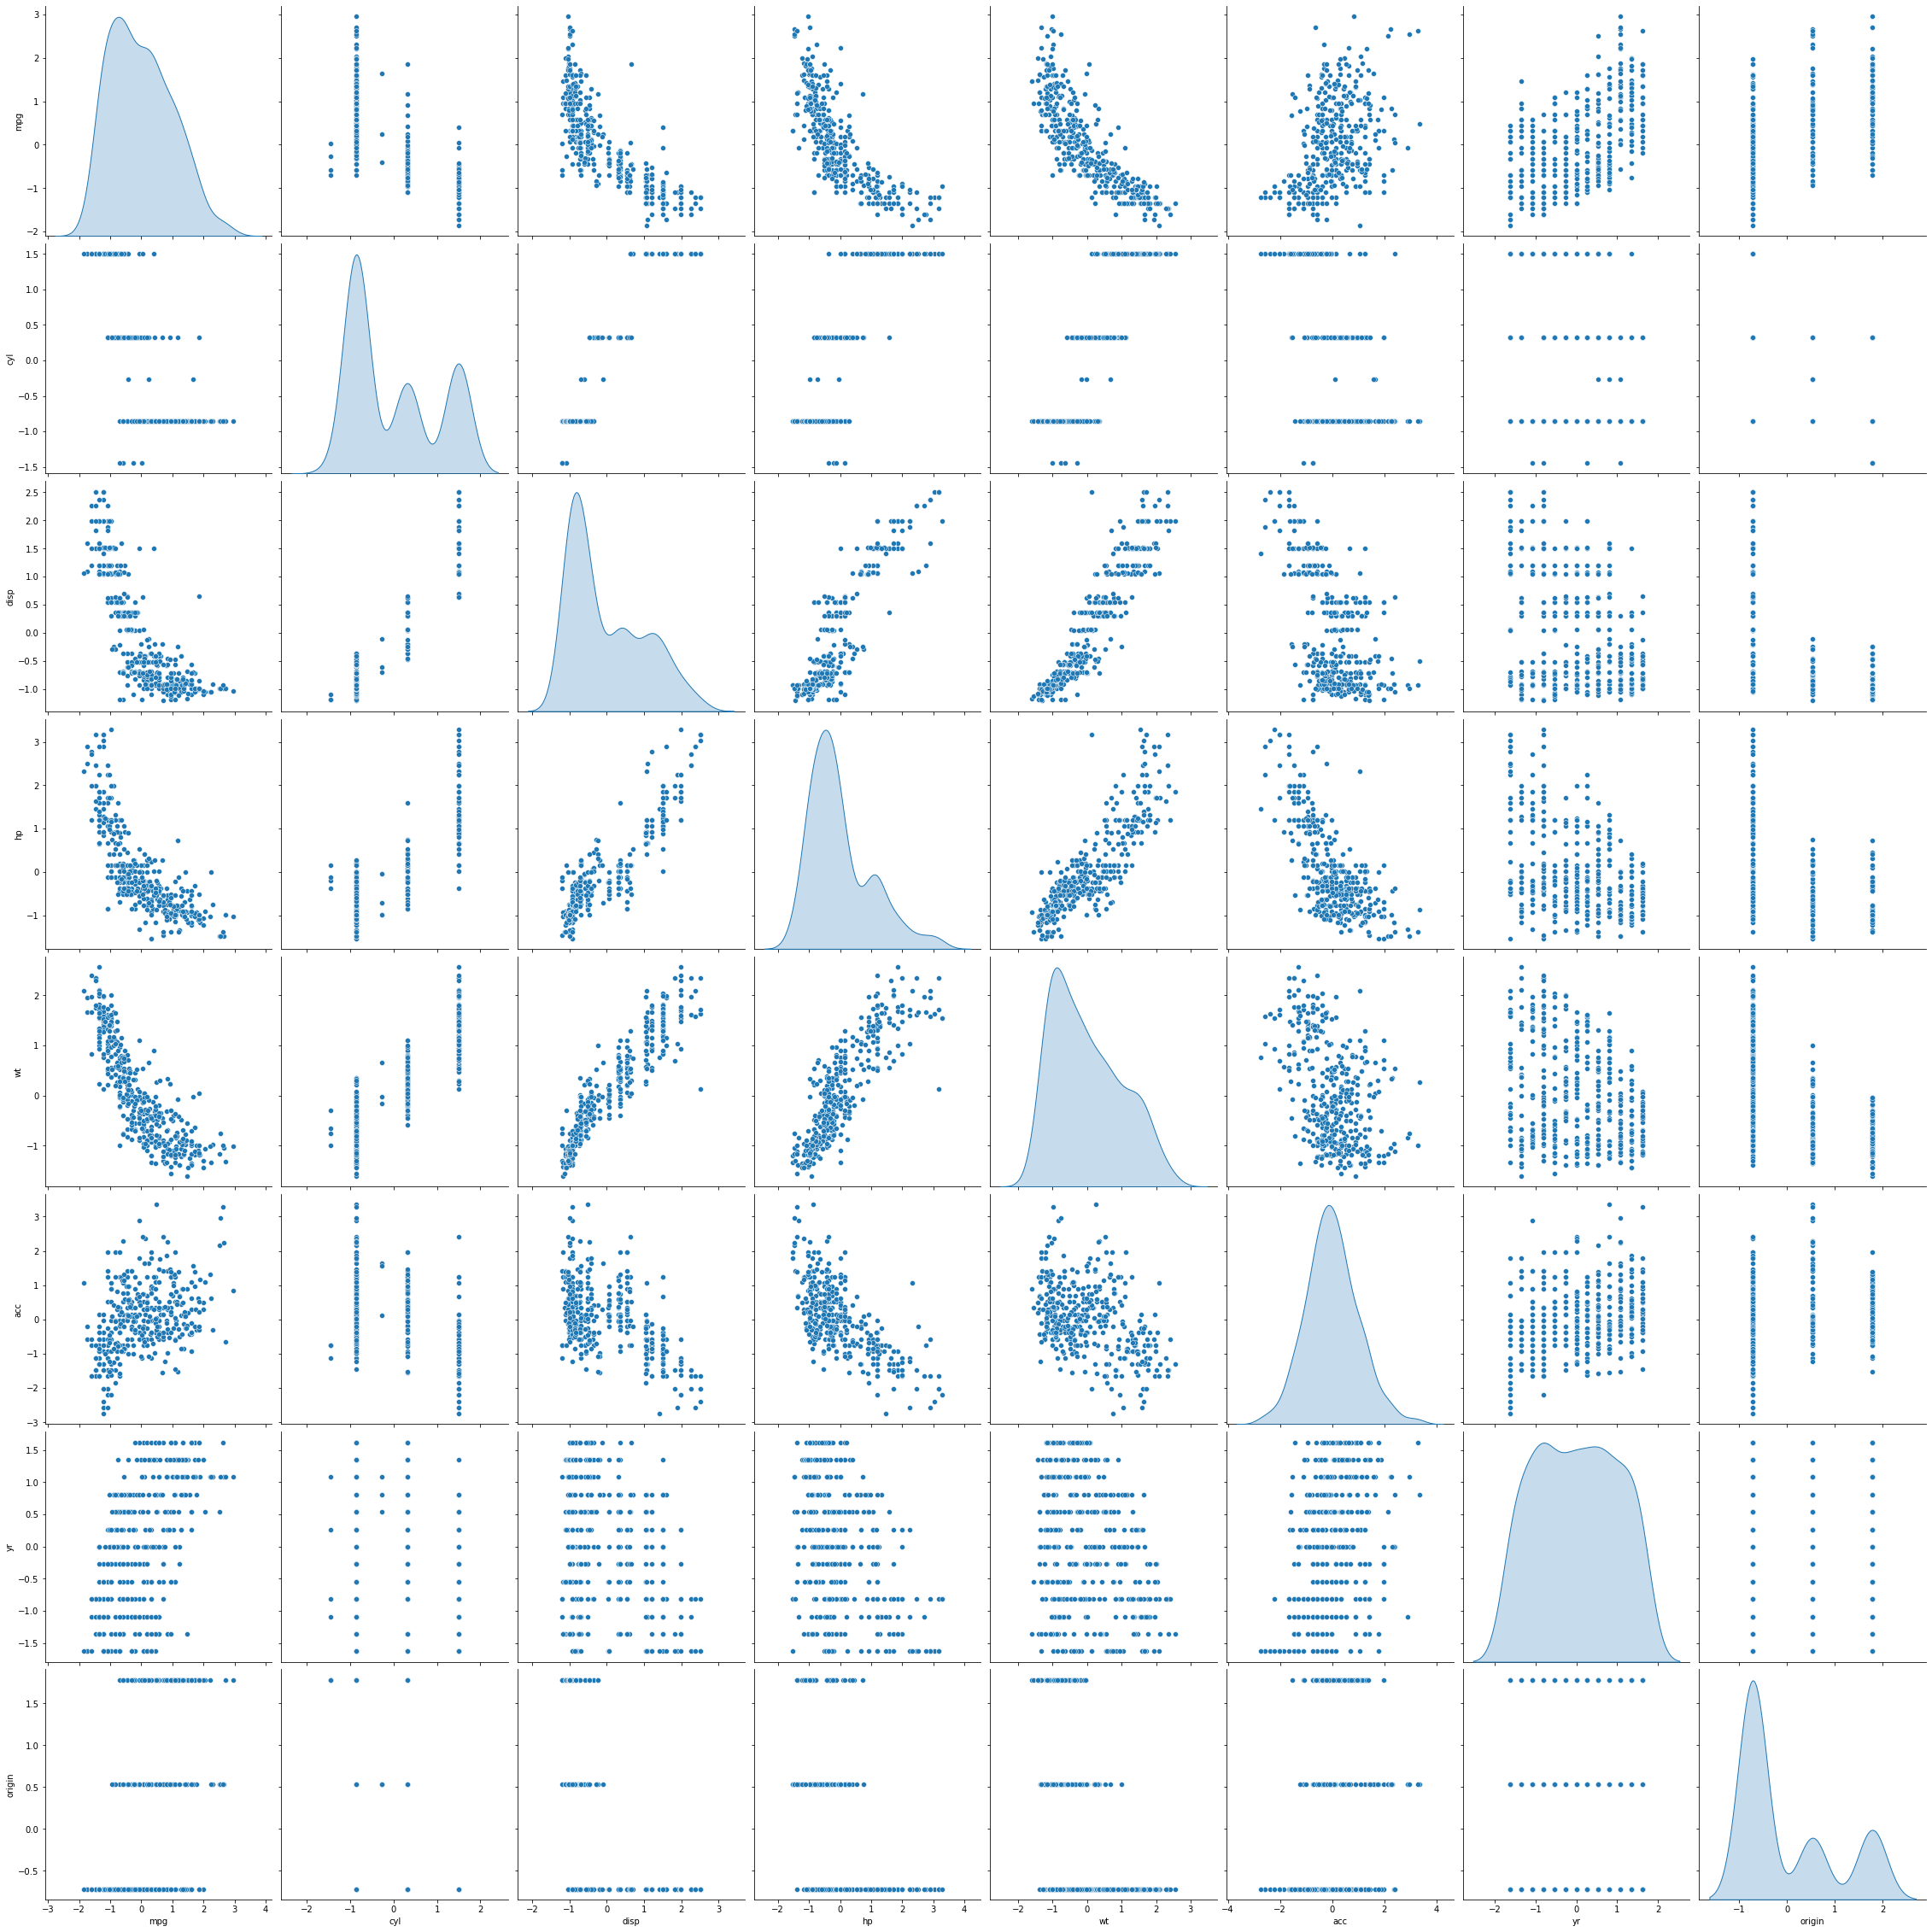

In [89]:
sns.pairplot(custDataScaled, height=4, diag_kind='kde');

#### Hierarchial Clustering 

In [72]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [73]:
carDataAttr['labels'] = model.labels_
carDataAttr.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,3
2,18.0,8,318.0,150.0,3436,11.0,70,1,3
3,16.0,8,304.0,150.0,3433,12.0,70,1,3
4,17.0,8,302.0,140.0,3449,10.5,70,1,3
5,15.0,8,429.0,198.0,4341,10.0,70,1,3
6,14.0,8,454.0,220.0,4354,9.0,70,1,3
7,14.0,8,440.0,215.0,4312,8.5,70,1,3
8,14.0,8,455.0,225.0,4425,10.0,70,1,3
9,15.0,8,390.0,190.0,3850,8.5,70,1,3


In [74]:
custDataClust = carDataAttr.groupby(['labels'])

In [75]:
custDataClust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
labels,,,,,,,,
0,28.801932,4.043478,111.586957,80.895396,2312.183575,16.232367,77.062802,1.975845
1,33.781818,4.363636,124.000000,65.636364,2828.636364,21.818182,79.636364,2.000000
2,19.208451,6.112676,232.957746,98.569991,3277.098592,16.878873,75.352113,1.000000
3,14.684000,7.980000,345.470000,160.400000,4121.560000,12.702000,73.740000,1.000000
4,21.444444,6.000000,159.333333,119.222222,3073.555556,14.155556,77.777778,2.666667


In [76]:
#Importing cophenet for identifying the coefficients and linkage (single,conplete,avg,ward..)
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
#Pairwise distribution between data points
from scipy.spatial.distance import pdist

In [77]:
Z = linkage(custDataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.5583860195955768

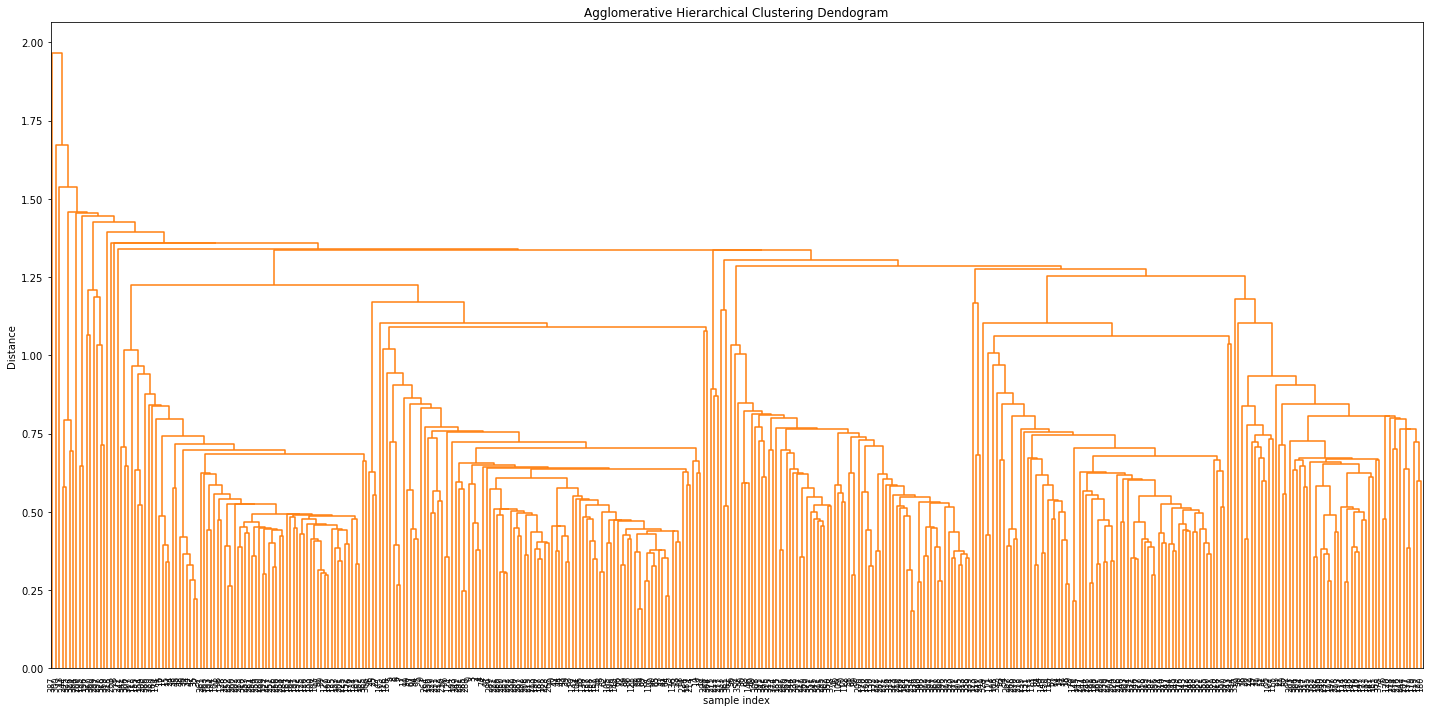

In [80]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [81]:
Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.7249869631316018

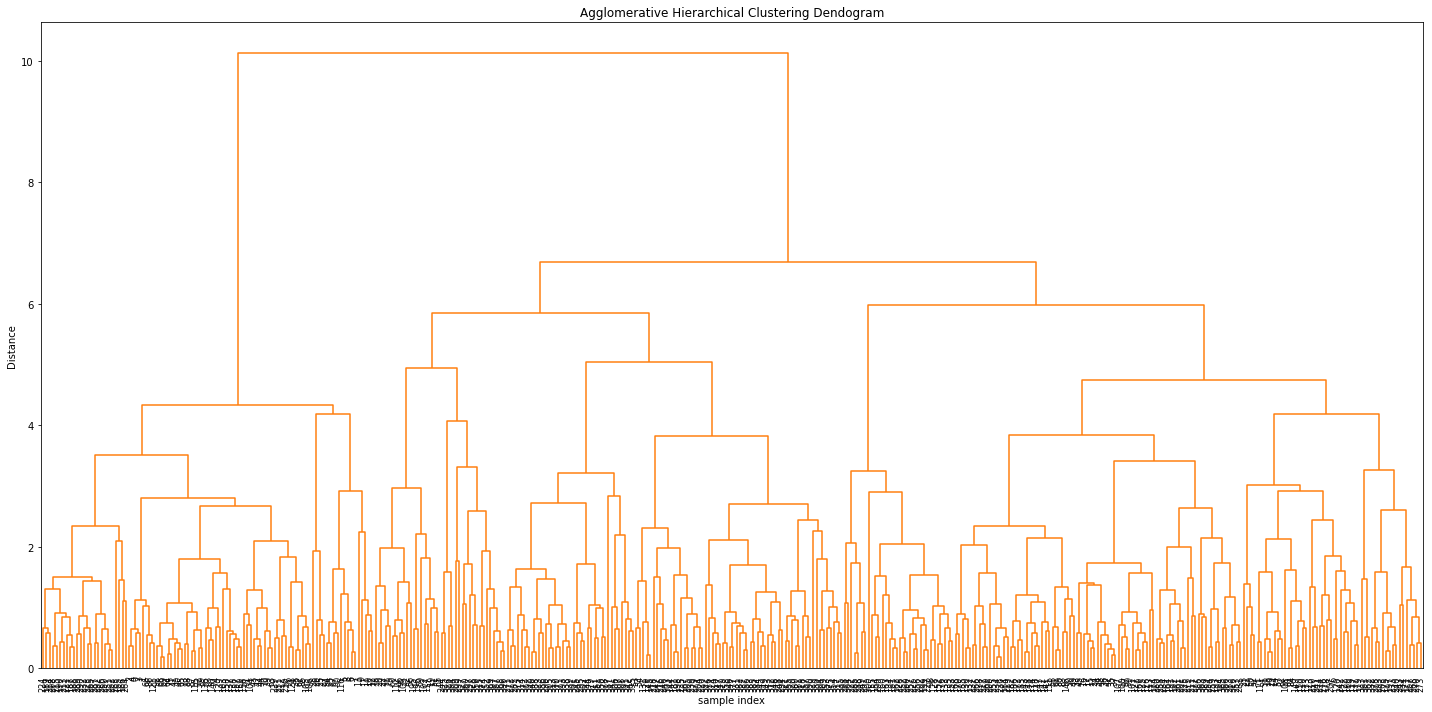

In [82]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [83]:
Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.6812668627246334

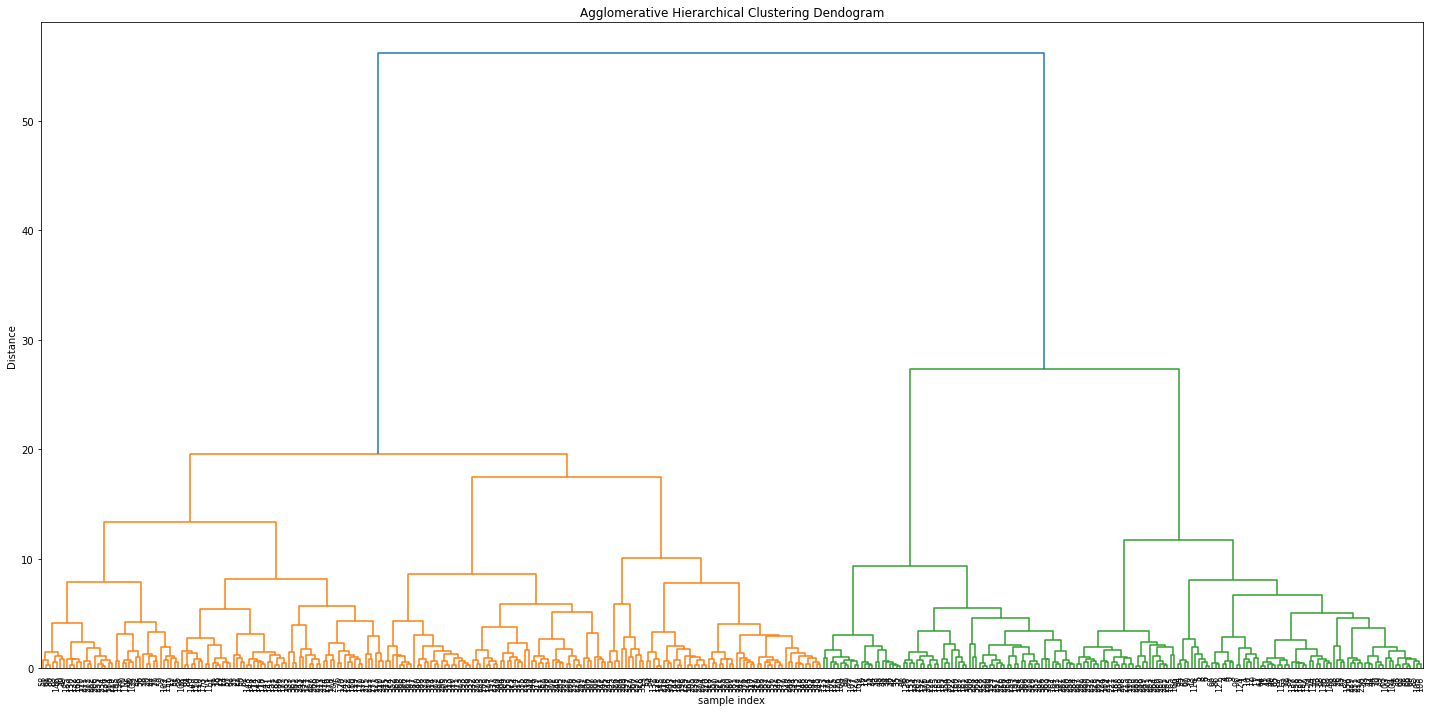

In [84]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### K-Means Clustering 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

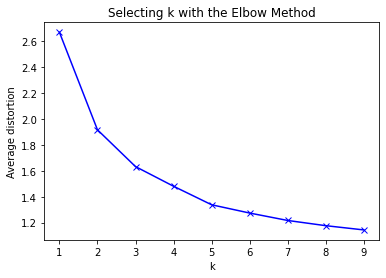

In [91]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    meanDistortions.append(sum(np.min(cdist(custDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / custDataScaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [92]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(custDataScaled)
prediction=final_model.predict(custDataScaled)

#Append the prediction 
carDataAttr["GROUP"] = prediction
custDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
carDataAttr.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,labels,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,3,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,3,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,3,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,3,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,3,0


In [93]:
custData_KMeans_Clust = carDataAttr.groupby(['GROUP'])
custData_KMeans_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
GROUP,,,,,,,,,
0,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000,3.000000
1,34.137500,4.083333,99.527778,73.179705,2155.819444,16.734722,79.416667,2.763889,0.236111
2,19.104938,6.222222,233.444444,102.018141,3298.580247,16.632099,75.703704,1.037037,2.123457
3,28.791045,4.194030,132.567164,83.193116,2563.805970,16.549254,79.671642,1.074627,0.074627
4,24.619048,4.047619,108.601190,85.803207,2347.619048,16.107143,73.309524,2.107143,0.154762


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>]],
      dtype=object)

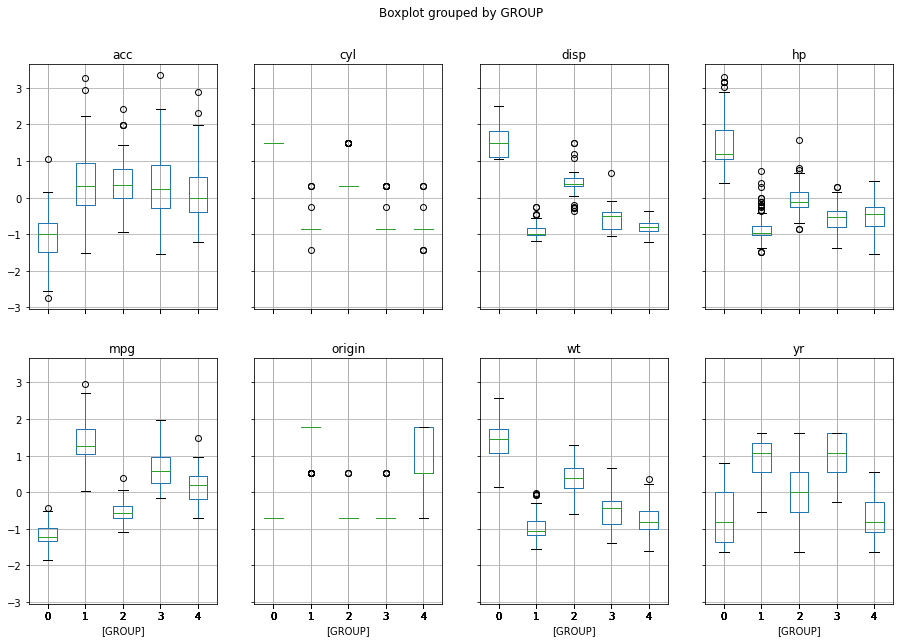

In [94]:
custDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [95]:
# Let us first start with K = 10
final_model=KMeans(10)
final_model.fit(custDataScaled)
prediction=final_model.predict(custDataScaled)

#Append the prediction 
carDataAttr["GROUP"] = prediction
custDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
carDataAttr.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,labels,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,3,6
1,15.0,8,350.0,165.0,3693,11.5,70,1,3,6
2,18.0,8,318.0,150.0,3436,11.0,70,1,3,6
3,16.0,8,304.0,150.0,3433,12.0,70,1,3,6
4,17.0,8,302.0,140.0,3449,10.5,70,1,3,6


In [96]:
custData_KMeans_Clust = carDataAttr.groupby(['GROUP'])
custData_KMeans_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin,labels
GROUP,,,,,,,,,
0,35.171795,4.025641,90.820513,64.294087,2050.948718,18.400000,78.589744,2.820513,0.128205
1,16.013333,8.000000,330.733333,147.166667,4025.166667,13.206667,76.933333,1.000000,3.000000
2,24.736842,4.070175,107.578947,90.333333,2374.543860,15.080702,73.912281,2.421053,0.210526
3,27.709091,4.318182,140.454545,81.975881,2828.272727,19.463636,80.454545,1.227273,0.227273
4,19.104938,6.222222,233.444444,102.018141,3298.580247,16.632099,75.703704,1.037037,2.123457
5,24.275862,4.000000,112.775862,76.533427,2313.172414,18.237931,72.241379,1.413793,0.034483
6,13.857143,8.000000,333.857143,155.500000,4146.095238,13.083333,72.285714,1.000000,3.000000
7,13.363636,8.000000,407.272727,196.318182,4361.772727,10.750000,71.000000,1.000000,3.000000
8,32.915152,4.151515,109.818182,83.680891,2279.757576,14.766667,80.393939,2.696970,0.363636


Dropping Origin to see the difference in the clustering

In [101]:
carDataAttr.drop(['GROUP'], axis=1, inplace=True)

In [102]:
carDataAttr.drop(['origin'], axis=1, inplace=True)

In [104]:
carDataAttr.drop(['labels'], axis=1, inplace=True)

In [105]:
carDataAttr.head()

,mpg,cyl,disp,hp,wt,acc,yr
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [106]:
custDataScaled=carDataAttr.apply(zscore)
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [107]:
carDataAttr['labels'] = model.labels_
carDataAttr.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,labels
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
5,15.0,8,429.0,198.0,4341,10.0,70,1
6,14.0,8,454.0,220.0,4354,9.0,70,1
7,14.0,8,440.0,215.0,4312,8.5,70,1
8,14.0,8,455.0,225.0,4425,10.0,70,1
9,15.0,8,390.0,190.0,3850,8.5,70,1


In [108]:
Z = linkage(custDataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.7115418348597531

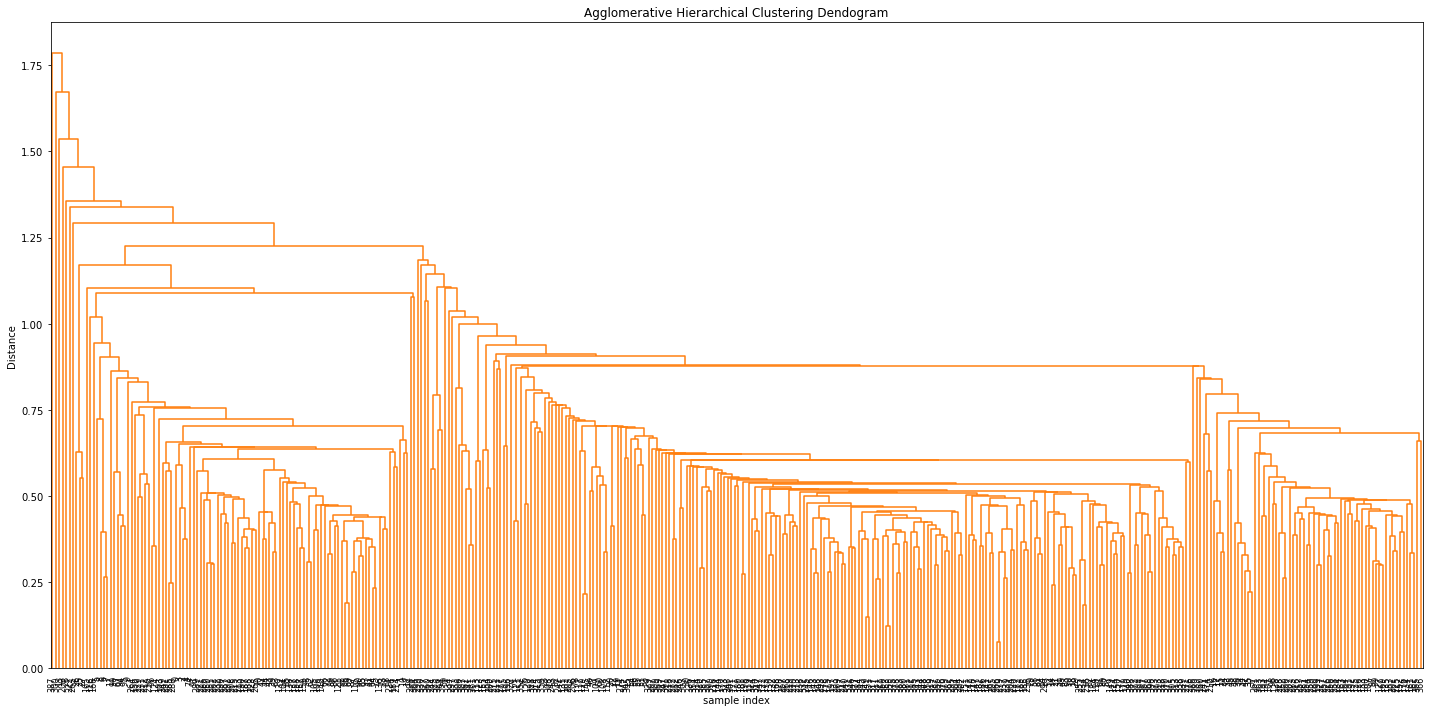

In [109]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [110]:
Z = linkage(custDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.7490145452206304

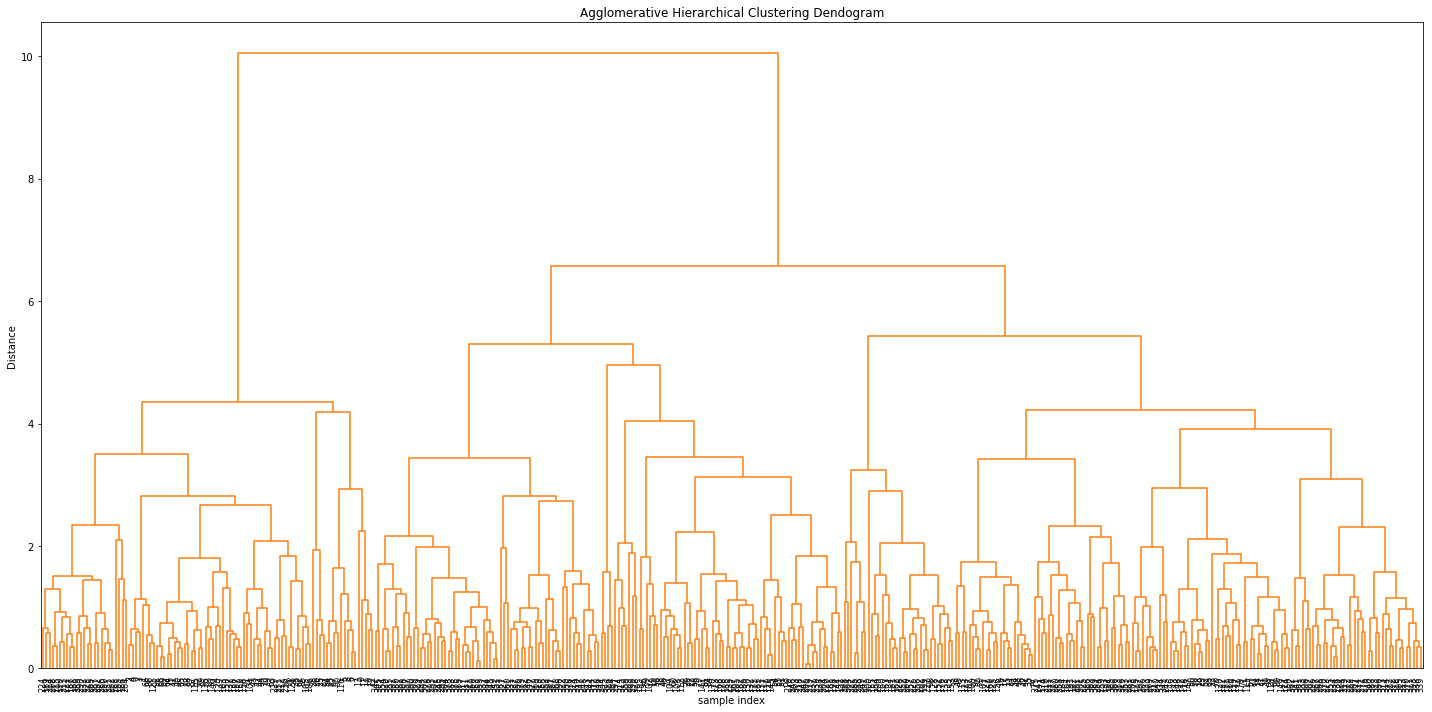

In [111]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [112]:
Z = linkage(custDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(custDataScaled))

c

0.7699654513315576

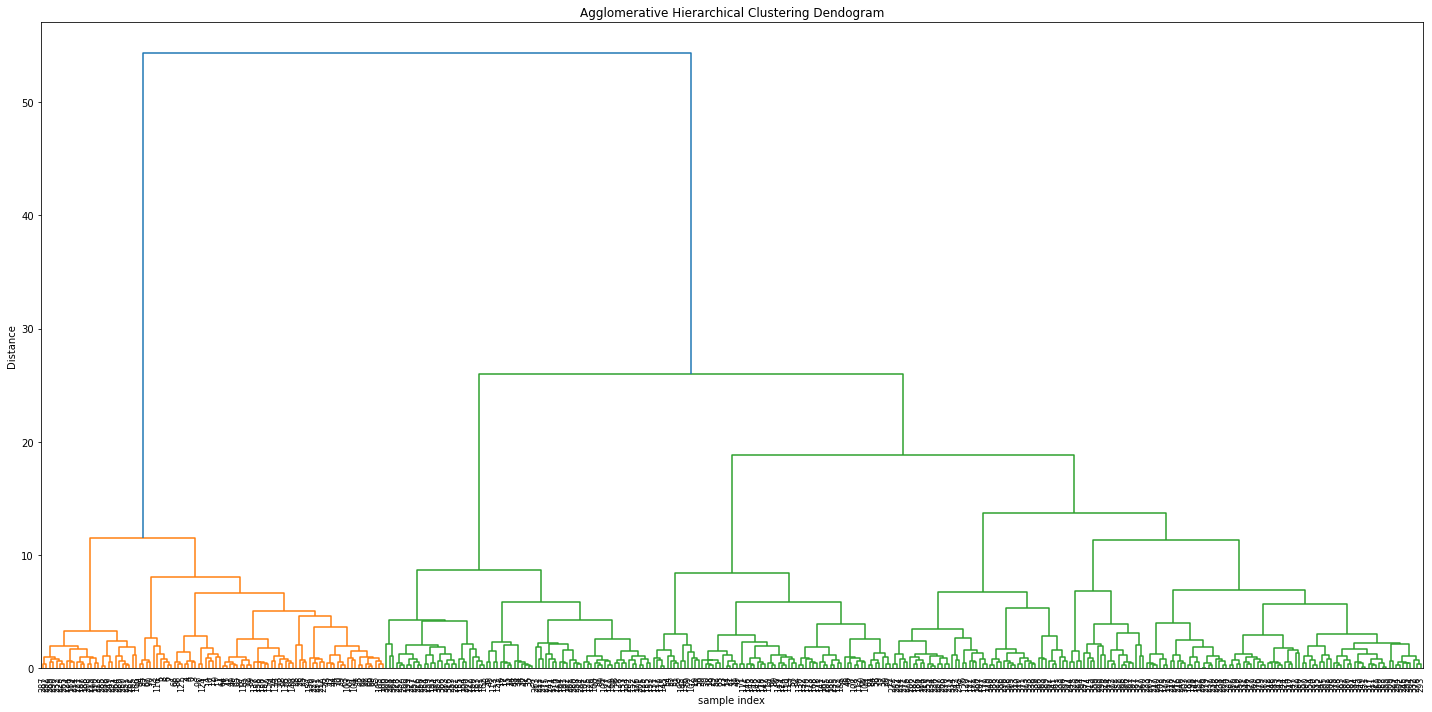

In [113]:
plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

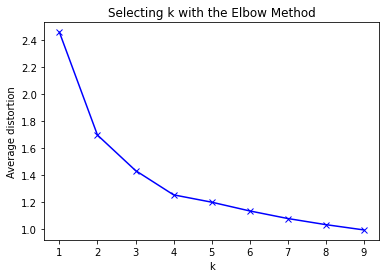

In [114]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    meanDistortions.append(sum(np.min(cdist(custDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / custDataScaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [126]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(custDataScaled)
prediction=final_model.predict(custDataScaled)

#Append the prediction 
carDataAttr["GROUP"] = prediction
custDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
carDataAttr.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,labels,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,3
1,15.0,8,350.0,165.0,3693,11.5,70,1,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,1


In [127]:
custData_KMeans_Clust = carDataAttr.groupby(['GROUP'])
custData_KMeans_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,labels
GROUP,,,,,,,,
0,35.085000,4.000000,95.516667,70.082313,2063.150000,16.368333,79.866667,3.000000
1,13.572917,8.000000,376.000000,178.604167,4266.666667,11.787500,71.750000,1.000000
2,23.728395,4.925926,159.679012,85.202570,2700.148148,17.776543,74.814815,1.802469
3,17.254348,7.195652,281.673913,124.554348,3754.869565,15.422826,76.402174,0.554348
4,26.434188,4.153846,122.705128,89.234781,2474.188034,15.294017,76.299145,2.717949


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

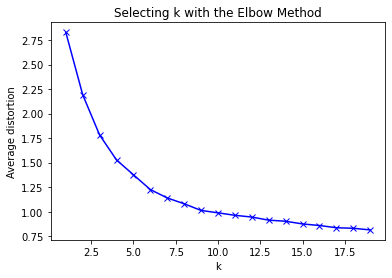

In [128]:
clusters=range(1,20)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custDataScaled)
    prediction=model.predict(custDataScaled)
    meanDistortions.append(sum(np.min(cdist(custDataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / custDataScaled.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [129]:
custData_KMeans_Clust.mean()

,mpg,cyl,disp,hp,wt,acc,yr,labels
GROUP,,,,,,,,
0,35.085000,4.000000,95.516667,70.082313,2063.150000,16.368333,79.866667,3.000000
1,13.572917,8.000000,376.000000,178.604167,4266.666667,11.787500,71.750000,1.000000
2,23.728395,4.925926,159.679012,85.202570,2700.148148,17.776543,74.814815,1.802469
3,17.254348,7.195652,281.673913,124.554348,3754.869565,15.422826,76.402174,0.554348
4,26.434188,4.153846,122.705128,89.234781,2474.188034,15.294017,76.299145,2.717949


• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
    
   <font color='blue'> There are 5 optimal clusters based on K means as elbow graph you can visualize the change in trend after 5th cluster bar</font>

In [130]:
y = custDataScaled['mpg']
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(custDataScaled, y)
regression_model.score(custDataScaled, y)
regression_model.coef_

array([ 1.00000000e+00,  1.63392138e-16, -1.51680706e-16, -3.82818961e-16,
       -3.68206681e-16,  2.19220304e-16,  1.58093560e-17,  2.89316394e-16])

In [131]:
final_model=KMeans(10)
final_model.fit(custDataScaled)
prediction=final_model.predict(custDataScaled)

#Append the prediction 
carDataAttr["GROUP"] = prediction
custDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
carDataAttr.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,labels,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,5
2,18.0,8,318.0,150.0,3436,11.0,70,1,5
3,16.0,8,304.0,150.0,3433,12.0,70,1,5
4,17.0,8,302.0,140.0,3449,10.5,70,1,5


In [132]:
y = custDataScaled['mpg']
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(custDataScaled, y)
regression_model.score(custDataScaled, y)
regression_model.coef_

array([ 1.00000000e+00, -4.28677907e-16,  7.33436173e-17, -3.29105620e-16,
        4.27120078e-16, -8.16035080e-16,  1.05293791e-15, -1.58560318e-16])

• Use linear regression model on different clusters separately and print the coefficients of the models individually

   <font color='blue'> When the cluster is 5 then the coefficients are [ 1.00000000e+00,  1.63392138e-16, -1.51680706e-16, -3.82818961e-16, -3.68206681e-16,  2.19220304e-16,  1.58093560e-17,  2.89316394e-16]</font>
   
   <font color='blue'>And when the cluster is 10 then the coefficients are [ 1.00000000e+00, -4.28677907e-16,  7.33436173e-17, -3.29105620e-16, 4.27120078e-16, -8.16035080e-16,  1.05293791e-15, -1.58560318e-16]</font>

• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.
    <font color='blue'>Clustering diffenet models tell us the best fit for clusting the data points. And it's done based on a similarity measure to group similar data objects together. This similarity measure is most common and used in most applications based on distance functions such as Euclidean distance, Manhattan distance, Minkowski distance, Cosine similarity, etc. to group objects in clusters.</font>

End